In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# uploading the dataset
data = pd.read_csv(r"C:\Users\m\Downloads\excel files\vehicles.csv")

In [3]:
# displaying top 5 rows
pd.set_option('display.max_columns', None)
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
# checking data types and nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
# printing number of missing values per each column and their percentage of total rows
for column in data.columns:
    print(column , '\n\n', ' missing values : ', data[column].isnull().sum(),' , ',
          '\t percentage : ', (data[column].isnull().sum()/len(data)) * 100 , '\n')

id 

  missing values :  0  ,  	 percentage :  0.0 

url 

  missing values :  0  ,  	 percentage :  0.0 

region 

  missing values :  0  ,  	 percentage :  0.0 

region_url 

  missing values :  0  ,  	 percentage :  0.0 

price 

  missing values :  0  ,  	 percentage :  0.0 

year 

  missing values :  1205  ,  	 percentage :  0.28228073463268366 

manufacturer 

  missing values :  17646  ,  	 percentage :  4.133714392803598 

model 

  missing values :  5277  ,  	 percentage :  1.2361787856071964 

condition 

  missing values :  174104  ,  	 percentage :  40.78523238380809 

cylinders 

  missing values :  177678  ,  	 percentage :  41.6224700149925 

fuel 

  missing values :  3013  ,  	 percentage :  0.7058189655172414 

odometer 

  missing values :  4400  ,  	 percentage :  1.0307346326836582 

title_status 

  missing values :  8242  ,  	 percentage :  1.9307533733133435 

transmission 

  missing values :  2556  ,  	 percentage :  0.5987631184407797 

VIN 

  missing value

In [8]:
# sum of null values over rows
data.isnull().sum(axis = 1).sort_values(ascending = False)

0         20
172776    20
80766     20
175630    20
295058    20
          ..
29208      1
134220     1
112960     1
134218     1
230220     1
Length: 426880, dtype: int64

In [9]:
# number of unique values in each column
data.nunique()

id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

In [10]:
# all columns
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

# EDA

In [4]:
# select wanted columns[dropping useless columns]
df = data.drop(['id', 'url', 'region_url', 'image_url', 'description', 'county', 'size'], axis = 1)
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,lat,long,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
# null percentage for remaining columns
round((df.isnull().sum()/len(df)) * 100)

region           0.0
price            0.0
year             0.0
manufacturer     4.0
model            1.0
condition       41.0
cylinders       42.0
fuel             1.0
odometer         1.0
title_status     2.0
transmission     1.0
VIN             38.0
drive           31.0
type            22.0
paint_color     31.0
state            0.0
lat              2.0
long             2.0
posting_date     0.0
dtype: float64

# Numeric columns

In [15]:
# numeric columns statistics
df.describe()

,price,year,odometer,lat,long
count,4.268800e+05,425675.000000,4.224800e+05,420331.000000,420331.000000
mean,7.519903e+04,2011.235191,9.804333e+04,38.493940,-94.748599
std,1.218228e+07,9.452120,2.138815e+05,5.841533,18.365462
min,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728
25%,5.900000e+03,2008.000000,3.770400e+04,34.601900,-111.939847
50%,1.395000e+04,2013.000000,8.554800e+04,39.150100,-88.432600
75%,2.648575e+04,2017.000000,1.335425e+05,42.398900,-80.832039
max,3.736929e+09,2022.000000,1.000000e+07,82.390818,173.885502


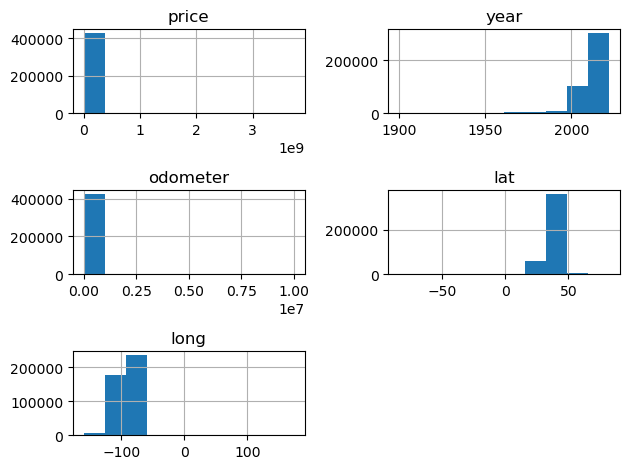

In [22]:
# distribution of numeric columns
df.hist()
plt.tight_layout()
plt.show()

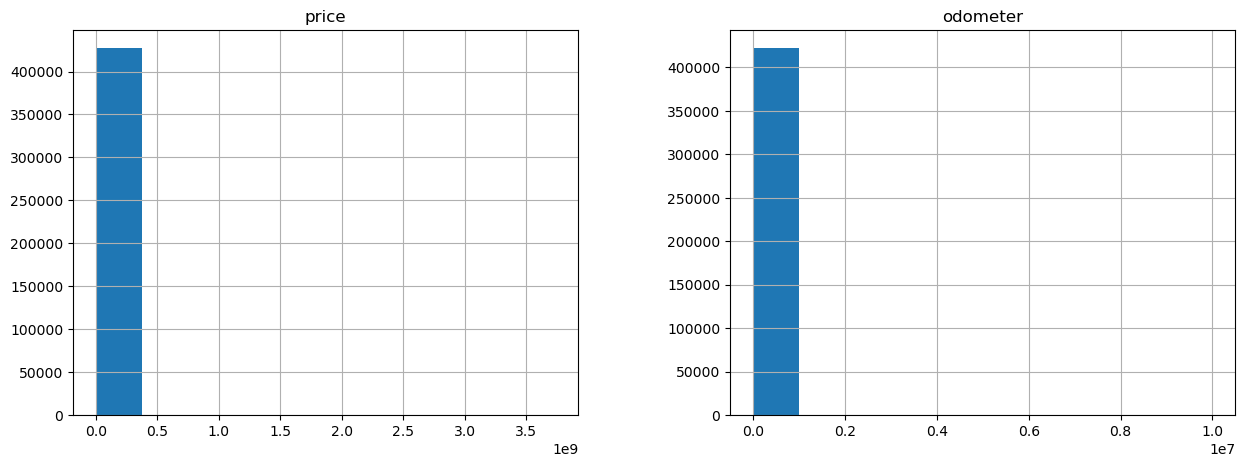

In [12]:
df[['price' ,'odometer']].hist(figsize = (15,5))
plt.show()

# categorical_columns

In [192]:
categorical_columns = df[['condition', 'cylinders', 'fuel', 'title_status',
                          'transmission', 'drive', 'type', 'paint_color']]

# printing unique values per each column and their percentage 
for column in categorical_columns:
    print(round(df[column].value_counts(normalize = True) * 100) , '\n')

condition
good         48.0
excellent    40.0
like new      8.0
fair          3.0
new           1.0
salvage       0.0
Name: proportion, dtype: float64 

cylinders
6 cylinders     38.0
4 cylinders     31.0
8 cylinders     29.0
5 cylinders      1.0
10 cylinders     1.0
other            1.0
3 cylinders      0.0
12 cylinders     0.0
Name: proportion, dtype: float64 

fuel
gas         84.0
other        7.0
diesel       7.0
hybrid       1.0
electric     0.0
Name: proportion, dtype: float64 

title_status
clean         97.0
rebuilt        2.0
salvage        1.0
lien           0.0
missing        0.0
parts only     0.0
Name: proportion, dtype: float64 

transmission
automatic    79.0
other        15.0
manual        6.0
Name: proportion, dtype: float64 

drive
4wd    45.0
fwd    36.0
rwd    20.0
Name: proportion, dtype: float64 

type
sedan          26.0
SUV            23.0
pickup         13.0
truck          11.0
other           7.0
coupe           6.0
hatchback       5.0
wagon           3.0
van

# Price

<Axes: >

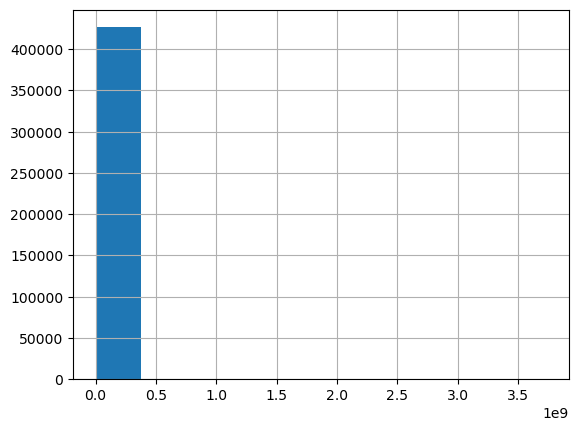

In [48]:
# prices distribution
df['price'].hist()

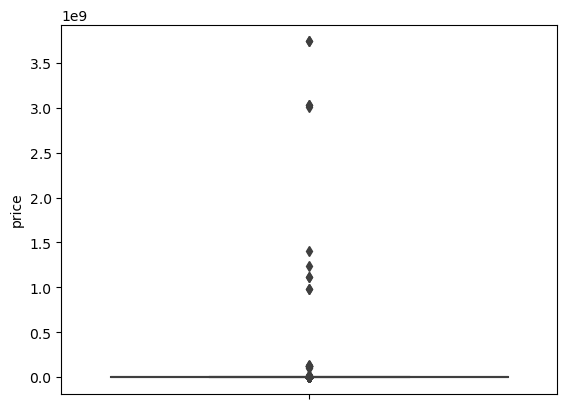

In [49]:
sns.boxplot(y = df['price'])
plt.show()

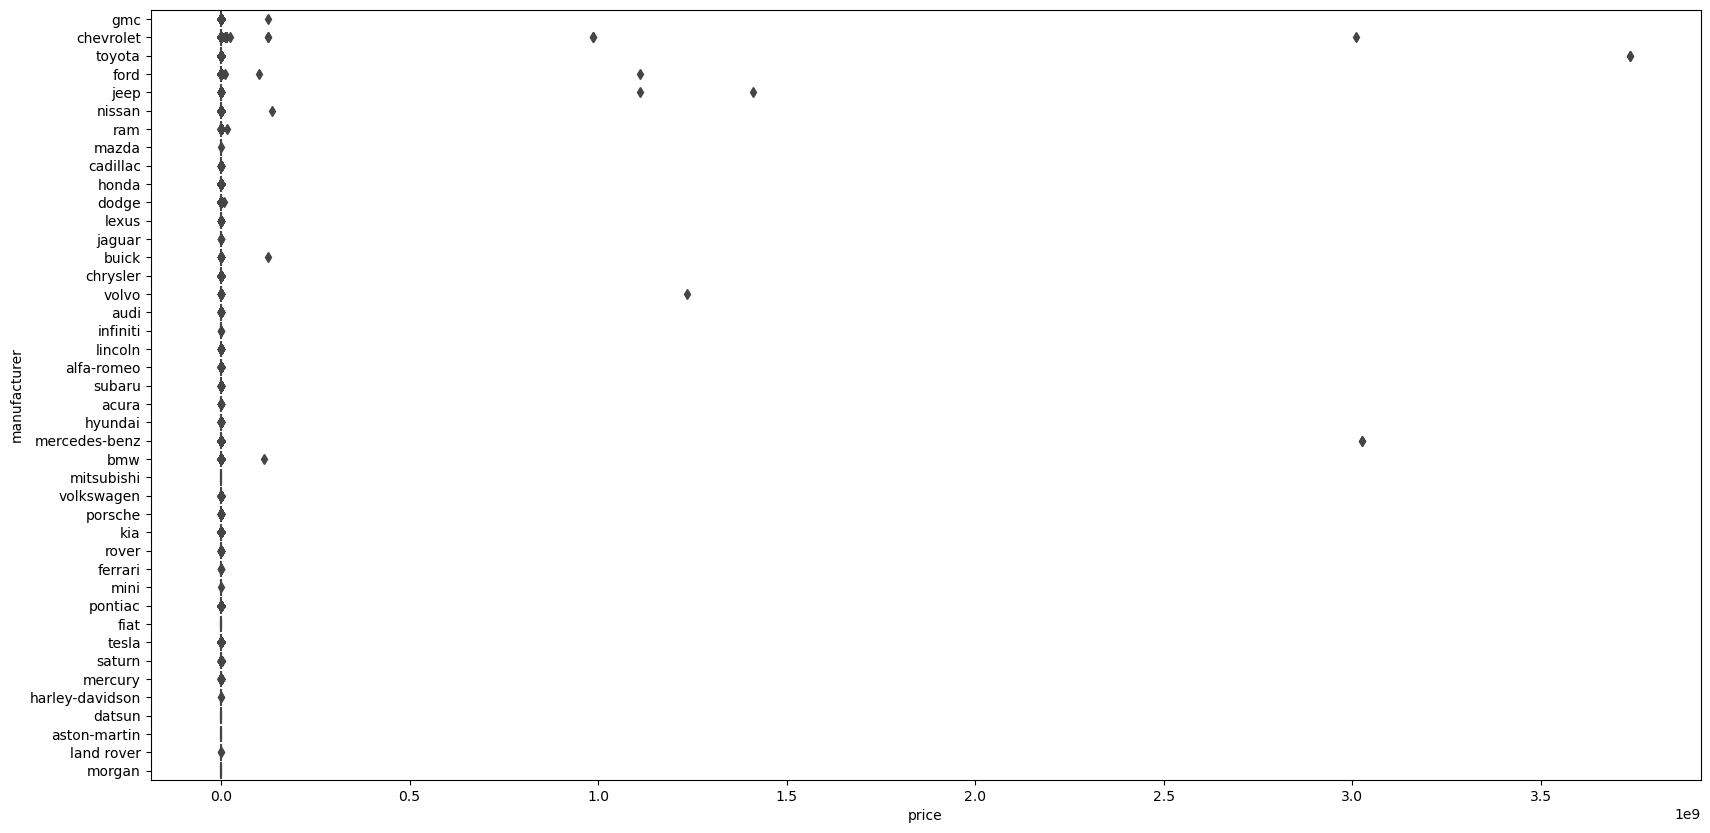

In [20]:
plt.figure(figsize = (20,10))
sns.boxplot(y = df['manufacturer'], x = df['price'])
plt.show()

In [50]:
# statistics
df['price'].describe()

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

In [51]:
# zero price cars
df[df['price'] == 0]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,lat,long,posting_date,posting_year
10,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN,NaN
11,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN,NaN
12,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN,NaN
13,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN,NaN
14,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426764,wyoming,0,2018.0,NaN,peterbilt 579,NaN,NaN,diesel,1.0,clean,automatic,NaN,NaN,NaN,NaN,wy,42.862274,-106.307144,2021-04-07T15:15:05-0600,2021.0
426812,wyoming,0,2006.0,toyota,scion tc,excellent,4 cylinders,gas,195000.0,clean,automatic,JTKDE177460109655,fwd,NaN,silver,wy,40.114685,-104.971971,2021-04-06T17:00:19-0600,2021.0
426832,wyoming,0,2004.0,toyota,prius,excellent,4 cylinders,hybrid,239000.0,clean,automatic,JTDKB20U840108051,fwd,NaN,blue,wy,40.114685,-104.971971,2021-04-05T17:00:55-0600,2021.0
426836,wyoming,0,2018.0,ram,2500,excellent,6 cylinders,diesel,20492.0,clean,automatic,3C6UR5HL3JG307217,4wd,truck,white,wy,45.082436,-94.334686,2021-04-05T15:18:42-0600,2021.0


count of prices under 10 power 1 : 
 =  34929


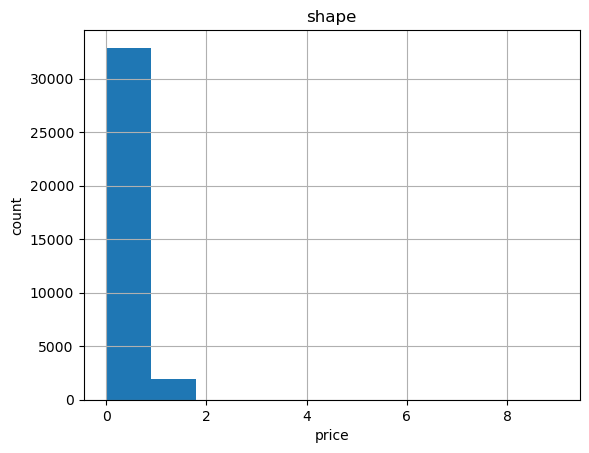

count of prices under 10 power 2 : 
 =  36222


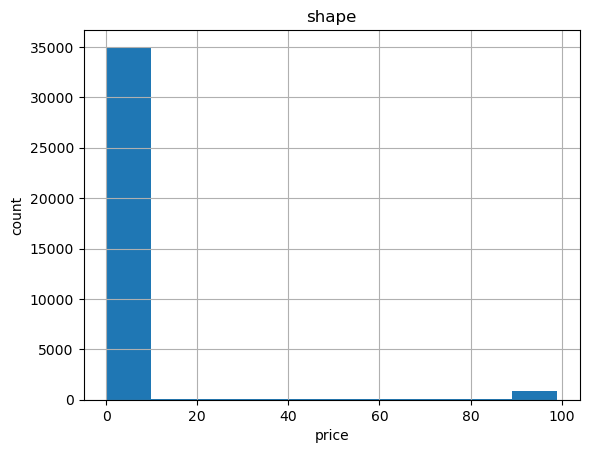

count of prices under 10 power 3 : 
 =  46315


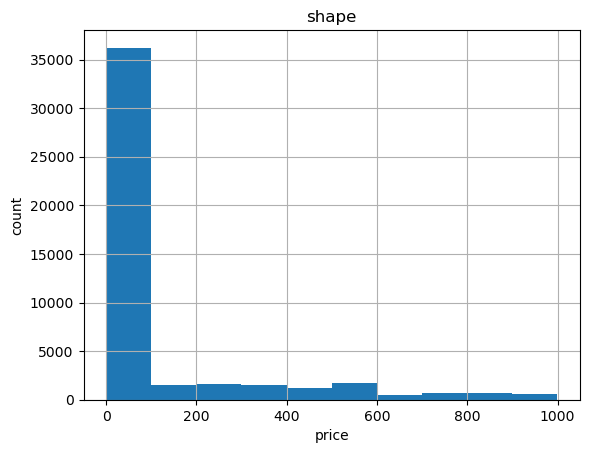

count of prices under 10 power 4 : 
 =  174964


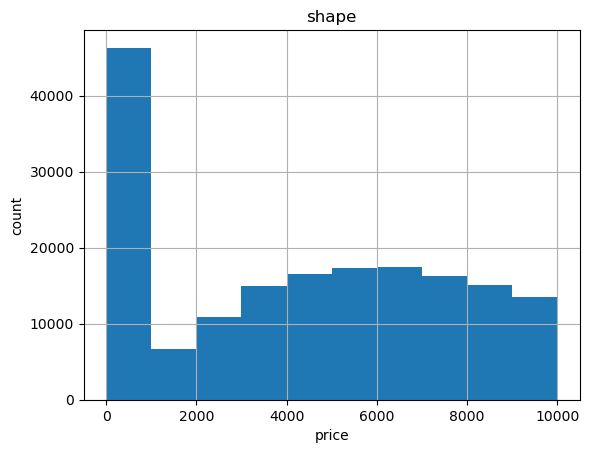

count of prices under 10 power 5 : 
 =  426183


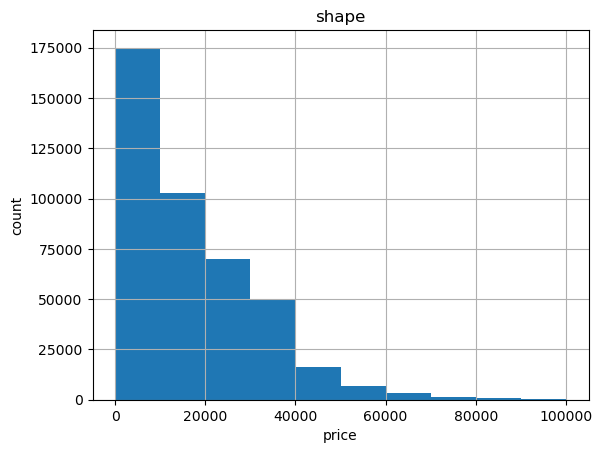

count of prices under 10 power 6 : 
 =  426820


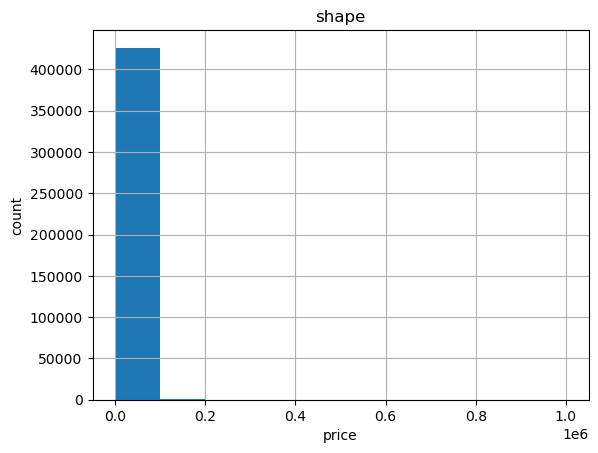

count of prices under 10 power 7 : 
 =  426850


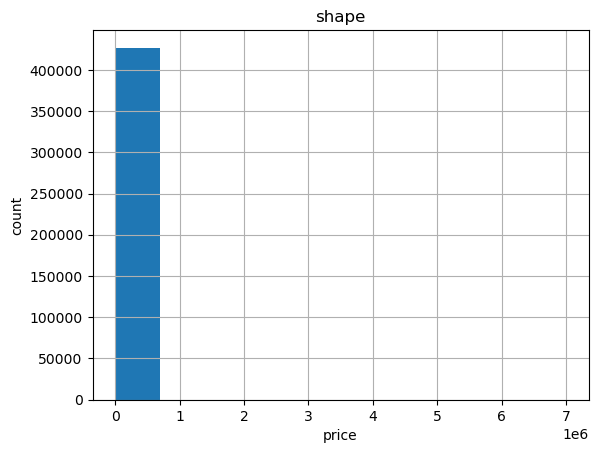

count of prices under 10 power 8 : 
 =  426861


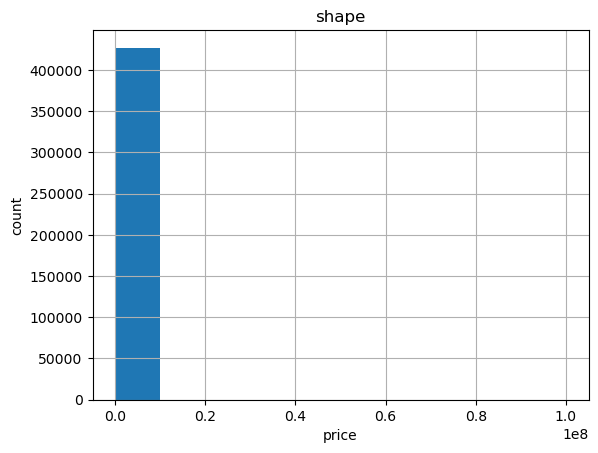

count of prices under 10 power 9 : 
 =  426871


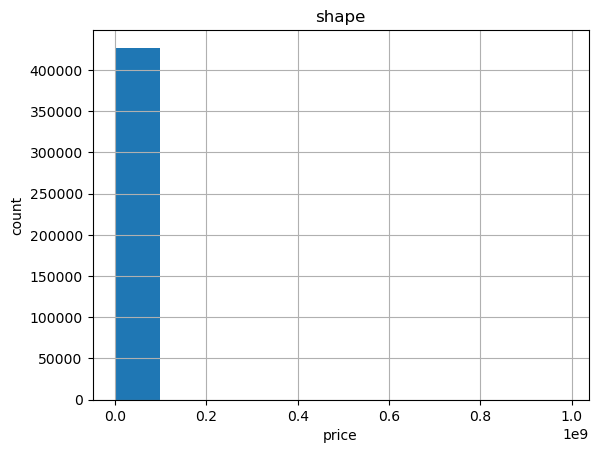

In [9]:
# defining outliers' boundaries
for i in range(1, 10):
    print('count of prices under 10 power', i, ': \n = ', len(df[df['price'] < (10**i)]))
    df[df['price'] < 10**i]['price'].hist()
    plt.xlabel('price')
    plt.ylabel('count')
    plt.title('shape')
    plt.show()


In [77]:
print('zero prices: ', len(df[df['price'] == 0]), '\n')
print('0 < prices < 100 : ', len(df[df['price'].between(0,100, inclusive = 'neither')]), '\n')
print('100 <= prices < 1000 : ', len(df[df['price'].between(100,1000, inclusive = 'left')]), '\n')
print('1000 <= prices <= 10000 : ', len(df[df['price'].between(1000,10000, inclusive = 'both')]), '\n')
print('10000 < prices <= 100000 : ', len(df[df['price'].between(10000,100000, inclusive = 'right')]), '\n')
print('prices > 100000: ', len(df[df['price'] > 100000]))

zero prices:  32895 

0 < prices < 100 :  3327 

100 <= prices < 1000 :  10093 

1000 <= prices <= 10000 :  129922 

10000 < prices <= 100000 :  249988 

prices > 100000:  655


<Axes: >

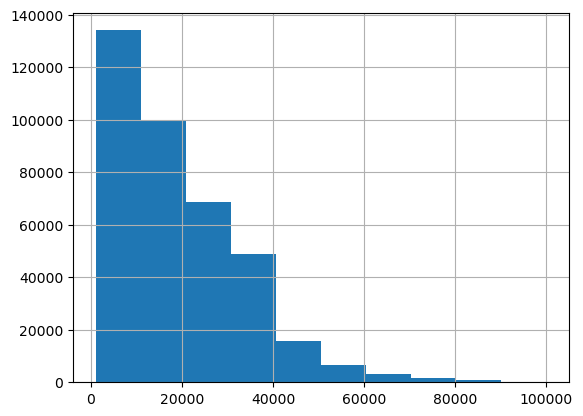

In [223]:
# finding the best distribution
df[df['price'].between(1000,100000, inclusive = 'both')]['price'].hist()

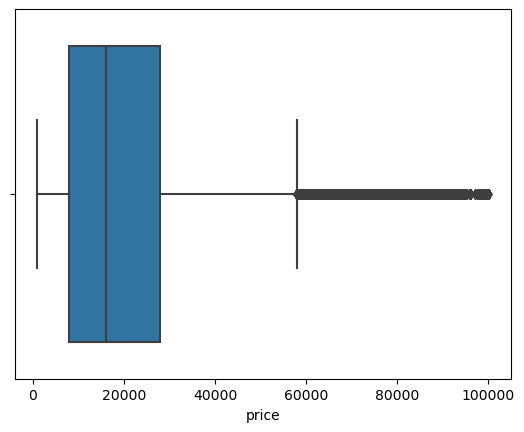

In [225]:
sns.boxplot(x = 'price',  data = df[df['price'].between(1000,100000, inclusive = 'both')])
plt.show()

In [11]:
new_len = len(df[df['price'].between(1000,100000, inclusive = 'both')])
print('length of the data after removing price outliers : \n\t', 
      new_len)
print('new length compared to the original data: \n\t',
      round((new_len/len(df)) * 100), '%')

length of the data after removing price outliers : 
	 379910
new length compared to the original data: 
	 89 %


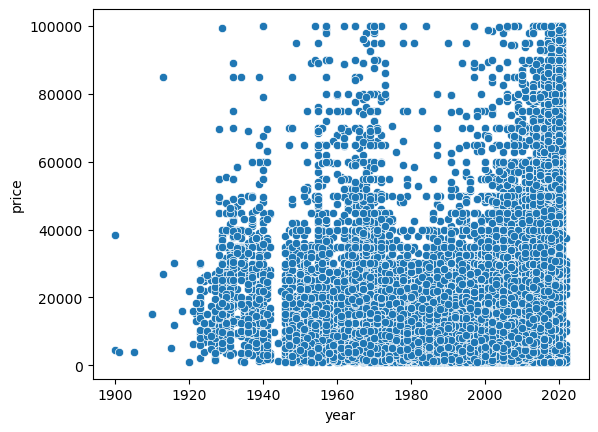

In [231]:
# price over years
sns.scatterplot(x = 'year', y = 'price', data = df[df['price'].between(1000,100000, inclusive = 'both')])
plt.show()

In [55]:
modified_price_df = df[df['price'].between(100,100000, inclusive = 'both')]

In [89]:
print('difference in null values')
df.isnull().sum() - modified_price_df.isnull().sum()

difference in null values


region              0
price               0
year               33
manufacturer     2002
model             743
condition       24849
cylinders       19291
fuel              420
odometer         2125
title_status      516
transmission      742
VIN             10734
drive           11794
type             8690
paint_color     14751
state               0
lat              3071
long             3071
posting_date        6
dtype: int64

# odometer

<Axes: >

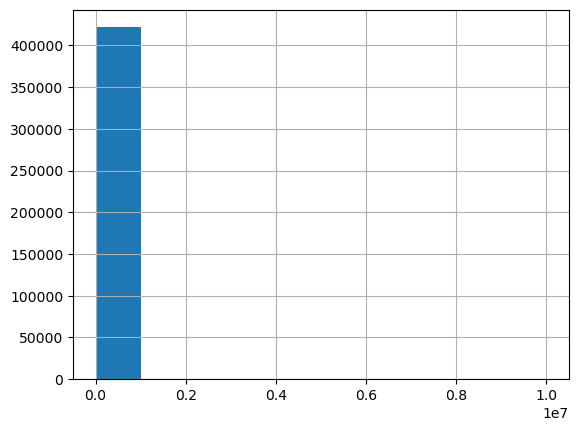

In [63]:
df['odometer'].hist()

In [64]:
df['odometer'].describe()

count    4.224800e+05
mean     9.804333e+04
std      2.138815e+05
min      0.000000e+00
25%      3.770400e+04
50%      8.554800e+04
75%      1.335425e+05
max      1.000000e+07
Name: odometer, dtype: float64

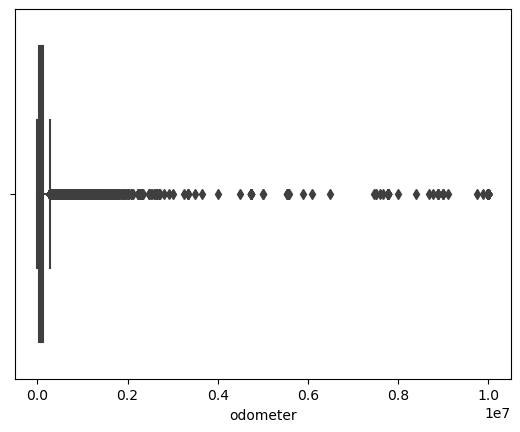

In [106]:
sns.boxplot(x = df['odometer'])
plt.show()

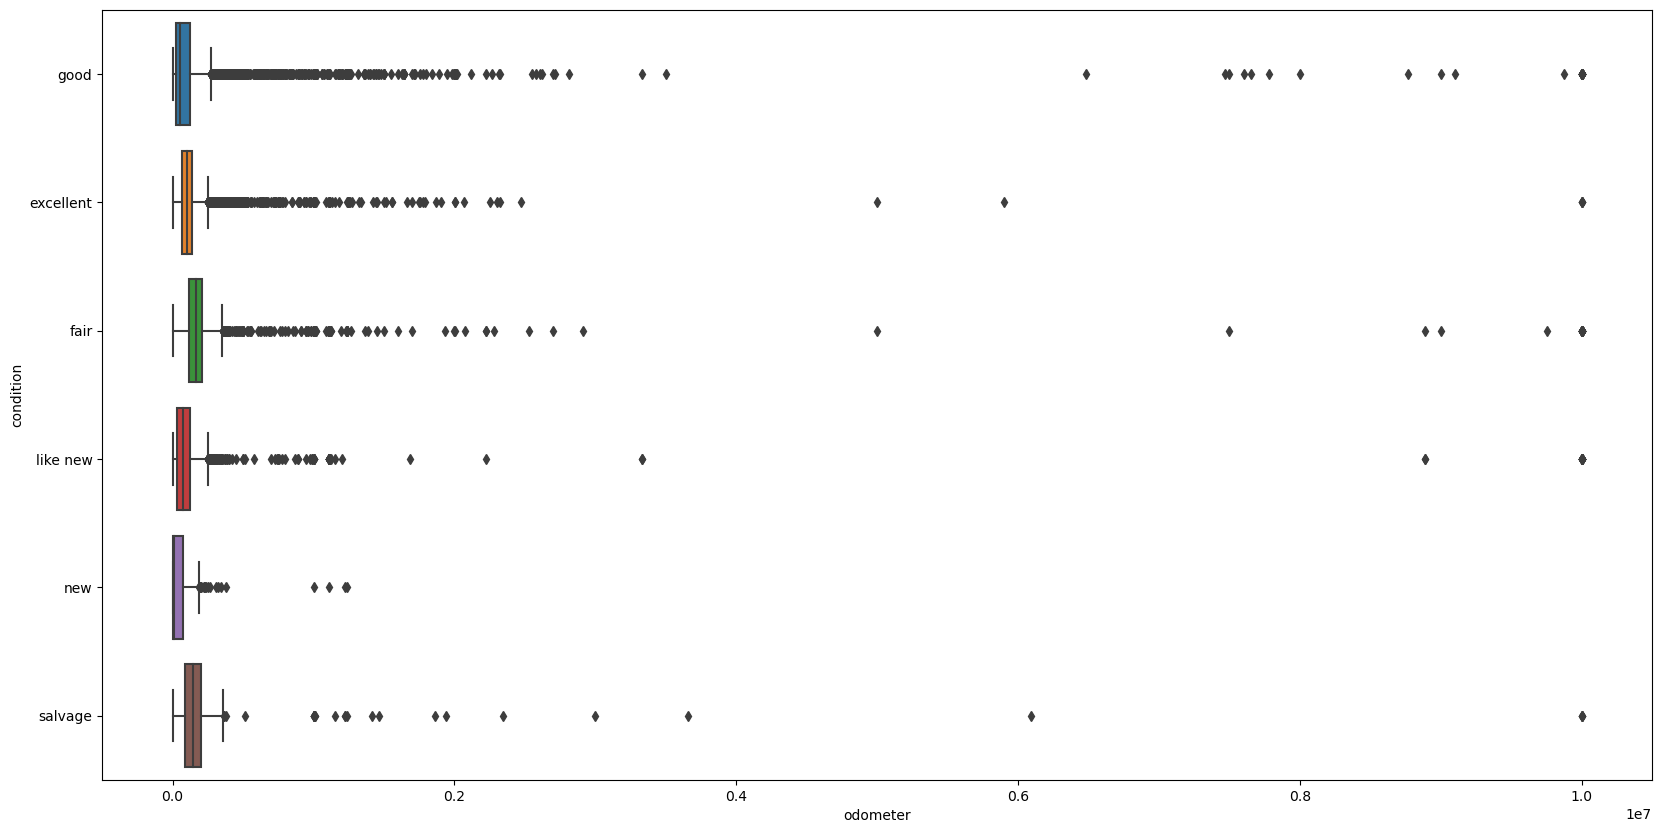

In [110]:
plt.figure(figsize = (20,10))
sns.boxplot(y = df['condition'], x = df['odometer'])
plt.show()

In [178]:
for i in range(1, 9):
    print('odometer <= 10 power',i, ', length = ', len(df[df['odometer'] <= (10**i)]))

odometer <= 10 power 1 , length =  5343
odometer <= 10 power 2 , length =  6974
odometer <= 10 power 3 , length =  10928
odometer <= 10 power 4 , length =  29761
odometer <= 10 power 5 , length =  247141
odometer <= 10 power 6 , length =  421904
odometer <= 10 power 7 , length =  422480
odometer <= 10 power 8 , length =  422480


<Axes: >

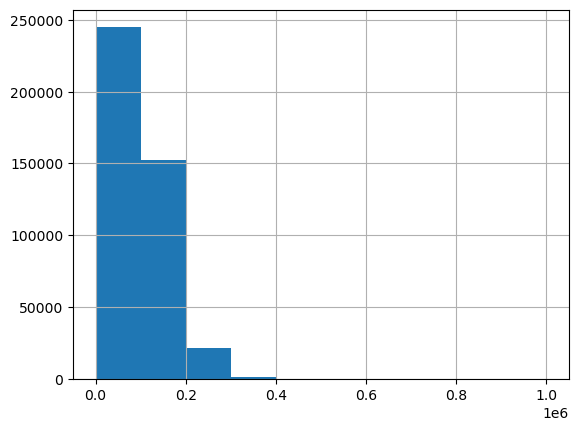

In [16]:
df[df['odometer'] <(10**6)]['odometer'].hist()

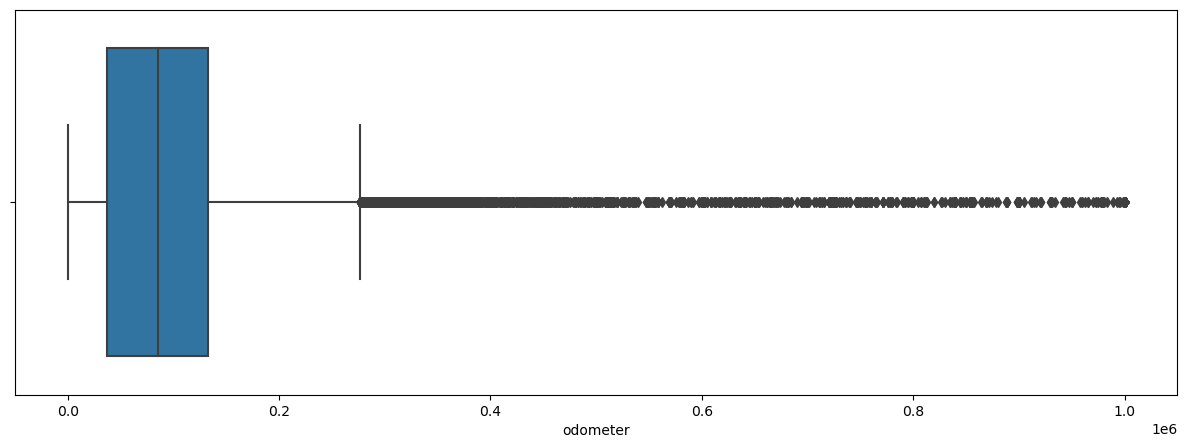

In [15]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'odometer', data = df[df['odometer'] <10**6])
plt.show()

In [18]:
len(df[df['odometer'] <10**6])

421841

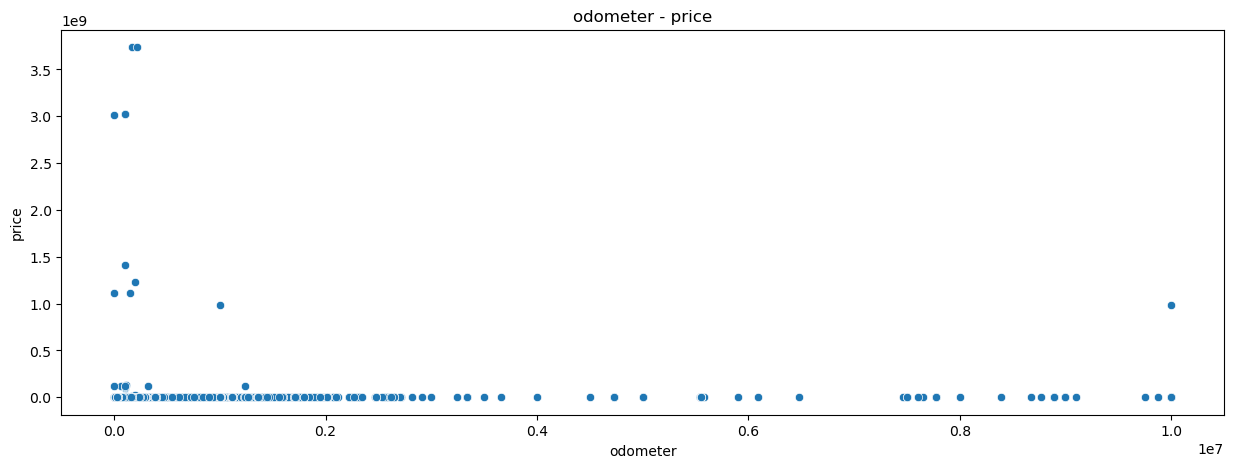

In [13]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = 'odometer', y = 'price', data = df)
plt.title('odometer - price')
plt.show()

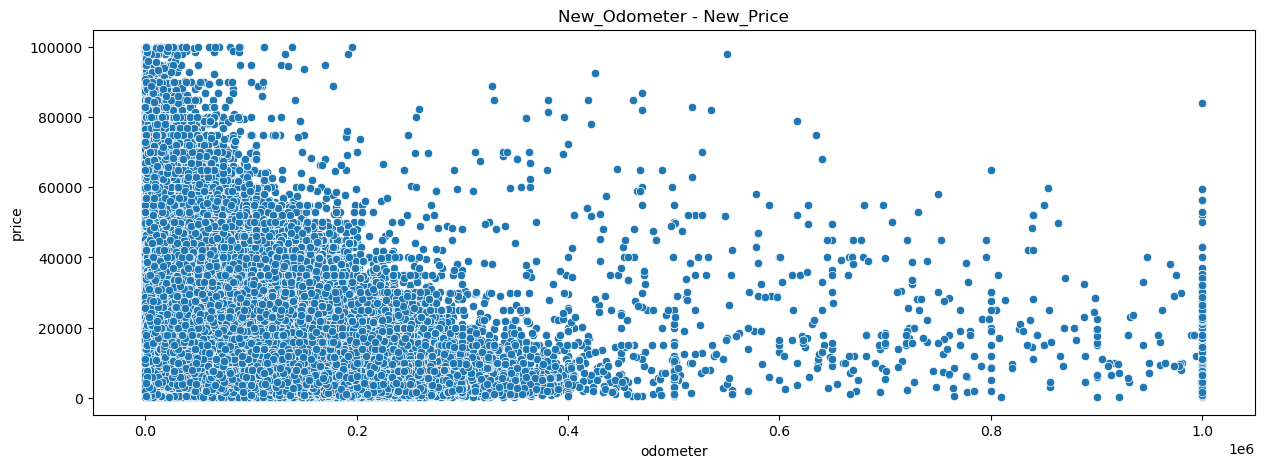

In [14]:
# New price & odometer
plt.figure(figsize = (15,5))
sns.scatterplot(x = 'odometer', y = 'price', 
                data = df[(df['odometer'] <=10**6) & (df['price'].between(100,100000, inclusive = 'both'))])
plt.title('New_Odometer - New_Price')
plt.show()

# year - posting_date

<Axes: >

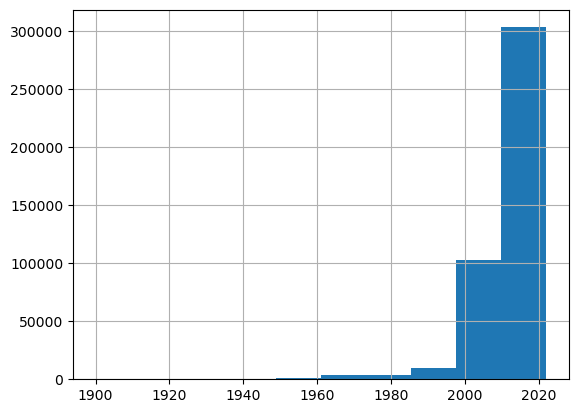

In [38]:
# years distribution
df['year'].hist()

In [30]:
# statistics
df['year'].describe()

count    425675.000000
mean       2011.235191
std           9.452120
min        1900.000000
25%        2008.000000
50%        2013.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

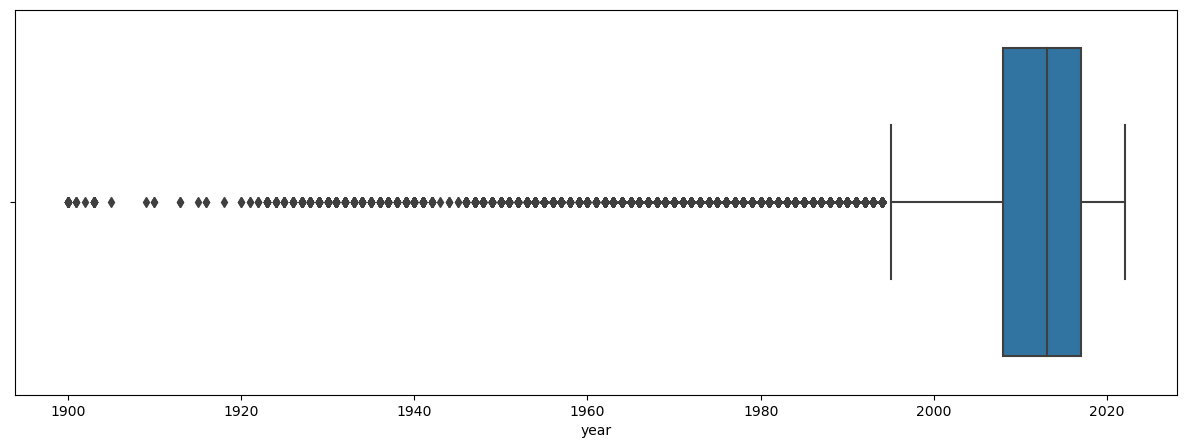

In [16]:
plt.figure(figsize = (15,5))
sns.boxplot(x = df['year'])
plt.show()

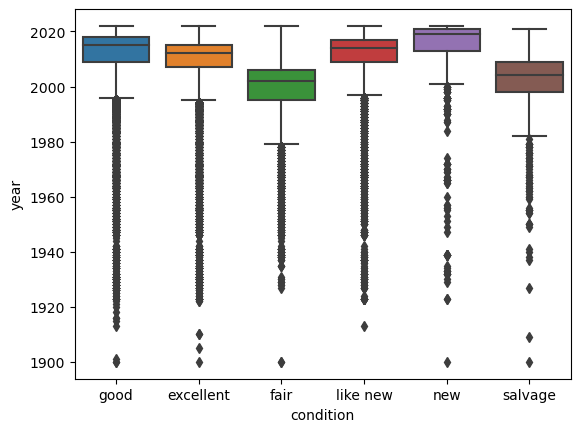

In [11]:
sns.boxplot(x = df['condition'], y = df['year'])
plt.show()

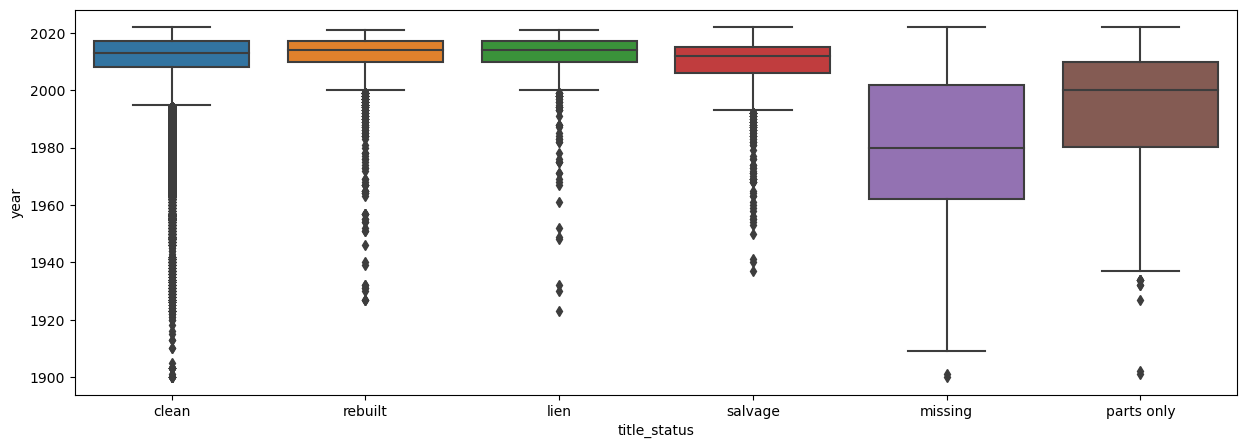

In [17]:
plt.figure(figsize = (15,5))
sns.boxplot(x = df['title_status'], y = df['year'])
plt.show()

In [15]:
df[df['title_status'].isin(['parts only', 'missing'])]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,lat,long,posting_date
599,birmingham,1500,2004.0,chevrolet,colorado,fair,4 cylinders,gas,150000.0,missing,automatic,NaN,rwd,truck,black,al,33.645200,-86.976700,2021-04-26T21:20:19-0500
1016,birmingham,12500,1946.0,NaN,AutoCar flatbed truck,fair,6 cylinders,gas,123.0,missing,manual,0906419252,NaN,NaN,NaN,al,42.188500,-122.693000,2021-04-19T18:18:16-0500
1091,birmingham,4000,1958.0,ford,pick up,good,8 cylinders,gas,110000.0,missing,automatic,NaN,4wd,NaN,black,al,33.374300,-85.399700,2021-04-18T10:06:34-0500
1391,birmingham,2950,1963.0,chevrolet,corvair convertible,fair,4 cylinders,gas,1164.0,missing,manual,NaN,rwd,convertible,blue,al,33.401000,-86.814000,2021-04-12T11:14:29-0500
1723,birmingham,5250,1999.0,ford,f-150,fair,8 cylinders,gas,248000.0,missing,automatic,NaN,rwd,pickup,red,al,33.506600,-86.742800,2021-04-05T23:07:48-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422100,milwaukee,0,2020.0,toyota,camry,NaN,4 cylinders,gas,14764.0,missing,automatic,4T1K61AK9LU336736,fwd,sedan,white,wi,43.006000,-87.942900,2021-05-04T16:03:06-0500
424398,milwaukee,18500,1929.0,ford,model a,NaN,NaN,gas,29.0,missing,automatic,NaN,NaN,NaN,NaN,wi,43.062200,-88.098000,2021-04-20T11:56:24-0500
425633,wausau,3000,1989.0,ford,f250,fair,8 cylinders,gas,123456.0,missing,manual,NaN,4wd,NaN,yellow,wi,44.375800,-89.806200,2021-05-02T19:13:29-0500
425993,wausau,8500,1974.0,jeep,cj5,good,6 cylinders,gas,19894.0,missing,manual,NaN,4wd,other,red,wi,44.935219,-89.626887,2021-04-16T13:08:38-0500


In [16]:
# outdated data
df[df['year'] <=2000]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,lat,long,posting_date
37,auburn,4500,1992.0,jeep,cherokee,excellent,6 cylinders,gas,192000.0,clean,automatic,NaN,4wd,NaN,NaN,al,32.645400,-85.378300,2021-05-03T07:38:05-0500
101,auburn,12990,1968.0,volvo,NaN,NaN,NaN,gas,99999.0,clean,manual,NaN,NaN,NaN,NaN,al,32.645400,-85.378300,2021-04-19T07:46:40-0500
137,auburn,2500,1966.0,NaN,1966 C-30 1 ton,good,6 cylinders,gas,47000.0,clean,manual,NaN,rwd,pickup,brown,al,32.416900,-85.709400,2021-04-11T07:07:52-0500
185,birmingham,1800,1998.0,toyota,rav4,good,4 cylinders,gas,240537.0,clean,manual,NaN,NaN,NaN,green,al,33.603500,-86.466800,2021-05-04T13:30:58-0500
193,birmingham,5900,1998.0,ford,f150,excellent,8 cylinders,gas,214000.0,clean,automatic,NaN,NaN,truck,red,al,33.649773,-86.610105,2021-05-04T10:27:09-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426813,wyoming,1000,1998.0,ford,explorer,NaN,6 cylinders,gas,190000.0,clean,automatic,NaN,NaN,NaN,NaN,wy,41.183600,-104.802300,2021-04-06T15:40:45-0600
426815,wyoming,5000,1996.0,NaN,96 Suburban,excellent,8 cylinders,gas,170000.0,clean,automatic,NaN,NaN,SUV,brown,wy,42.806836,-106.189091,2021-04-06T10:09:16-0600
426831,wyoming,9800,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,NaN,rwd,hatchback,red,wy,41.143700,-104.796200,2021-04-05T18:10:52-0600
426833,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,SAJGX2749VCOO8376,rwd,convertible,white,wy,43.642930,-108.222976,2021-04-05T16:29:38-0600


In [210]:
# extracting posting year from posting date
df['posting_year'] = df['posting_date'].str[0:4].astype('float32')

<Axes: >

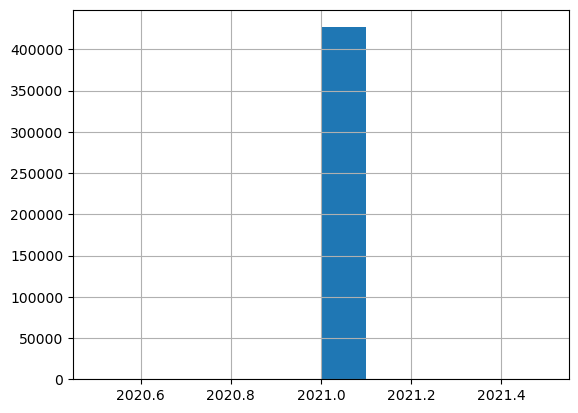

In [42]:
df['posting_year'].hist()

In [43]:
df['posting_year'].describe()

count    426812.00000
mean       2021.00000
std           8.00004
min        2021.00000
25%        2021.00000
50%        2021.00000
75%        2021.00000
max        2021.00000
Name: posting_year, dtype: float64

In [44]:
df['posting_year'].value_counts()

posting_year
2021.0    426812
Name: count, dtype: int64

In [45]:
# checking for date errors
df[df['year']> df['posting_year']][['year', 'posting_year']]

,year,posting_year
9738,2022.0,2021.0
32148,2022.0,2021.0
43183,2022.0,2021.0
65611,2022.0,2021.0
65612,2022.0,2021.0
...,...,...
410935,2022.0,2021.0
410936,2022.0,2021.0
412094,2022.0,2021.0
413805,2022.0,2021.0


In [46]:
# grouping data where the model_year > posted_year
df[df['year']> df['posting_year']][['year', 'posting_year']].value_counts()

year    posting_year
2022.0  2021.0          133
Name: count, dtype: int64

In [47]:
df[df['year'] == 2022]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,lat,long,posting_date,posting_year
9738,mohave county,6000,2022.0,NaN,Suzuki Vitara,NaN,NaN,gas,115000.0,clean,manual,NaN,NaN,NaN,NaN,az,35.263300,-114.022300,2021-04-07T15:56:59-0700,2021.0
32148,inland empire,0,2022.0,NaN,Freightliner SportChassis RHA112,NaN,NaN,diesel,10.0,clean,automatic,NaN,rwd,pickup,black,ca,34.023568,-117.111767,2021-04-29T08:54:44-0700,2021.0
43183,orange county,11990,2022.0,toyota,4runner 4wd,NaN,NaN,gas,207834.0,clean,automatic,JT3HN86R2Y0295479,4wd,NaN,custom,ca,33.694254,-117.846432,2021-04-28T19:16:46-0700,2021.0
65611,stockton,2500,2022.0,honda,civic cvcc,fair,4 cylinders,gas,605000.0,clean,manual,NaN,NaN,NaN,NaN,ca,37.738300,-121.434500,2021-04-18T18:43:58-0700,2021.0
65612,stockton,3500,2022.0,toyota,mighty max,fair,4 cylinders,gas,180000.0,clean,automatic,NaN,fwd,truck,white,ca,37.738300,-121.434500,2021-04-18T18:31:30-0700,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410935,wenatchee,384,2022.0,mitsubishi,eclipse cross le,excellent,4 cylinders,gas,5.0,NaN,automatic,JA4ATVAA0NZ006037,4wd,SUV,NaN,wa,47.717677,-117.411665,2021-05-01T16:06:10-0700,2021.0
410936,wenatchee,409,2022.0,mitsubishi,eclipse cross se,excellent,4 cylinders,gas,3.0,NaN,automatic,JA4ATWAA9NZ006009,4wd,SUV,NaN,wa,47.717677,-117.411665,2021-05-01T15:46:56-0700,2021.0
412094,wenatchee,431,2022.0,mitsubishi,eclipse cross sel,excellent,4 cylinders,gas,5.0,NaN,automatic,JA4ATWAA6NZ002435,4wd,SUV,NaN,wa,47.717677,-117.411665,2021-04-04T15:02:54-0700,2021.0
413805,yakima,431,2022.0,mitsubishi,eclipse cross sel,excellent,4 cylinders,gas,5.0,NaN,automatic,JA4ATWAA6NZ002435,4wd,SUV,NaN,wa,47.717677,-117.411665,2021-04-04T15:02:54-0700,2021.0


# Manufacturer & Model

In [161]:
df['manufacturer'].nunique()

42

In [159]:
df['manufacturer'].sort_values()

357345    acura
232136    acura
363113    acura
319469    acura
289133    acura
          ...  
426843      NaN
426846      NaN
426862      NaN
426863      NaN
426869      NaN
Name: manufacturer, Length: 426880, dtype: object

In [160]:
df['model'].nunique()

29667

In [20]:
df['model'].sort_values().head(50)

317864                                                  "t"
384480    $362.47, $1000 down, oac, 2.9%apr $362.47,luxu...
5847                                                      %
396112                                             & altima
161362                                   '50 Business Coupe
21142                                         '99 H1 Hummer
221214                                                (210)
276912                                                (300)
95668                                (cng) 2500 express van
332651                                      (s)port (s)edan
143075                                            * vmi * ♿
142936                                            * vmi * ♿
112984                                             *matrix*
404088                                              ,,,,,,,
364165                         ,2012,2013, SOME 2014 MODELS
363492                         ,2012,2013, SOME 2014 MODELS
365777                         ,2012,201

In [29]:
df[df['model'].str.contains('^[\W\d]+$') == True]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,lat,long,posting_date
275,birmingham,34995,2018.0,ram,2500,NaN,NaN,diesel,211000.0,clean,automatic,NaN,4wd,NaN,NaN,al,33.521000,-86.806600,2021-05-02T14:48:28-0500
286,birmingham,34995,2018.0,ram,1500,NaN,NaN,gas,104000.0,clean,automatic,NaN,rwd,NaN,NaN,al,33.521000,-86.806600,2021-05-02T12:34:27-0500
302,birmingham,19877,2011.0,ram,2500,NaN,NaN,diesel,183284.0,clean,automatic,3D7TP2CL9BG533799,NaN,NaN,white,al,33.168322,-87.491902,2021-05-02T08:48:14-0500
329,birmingham,19500,2008.0,ram,3500,good,6 cylinders,diesel,161000.0,clean,manual,NaN,4wd,truck,silver,al,33.493000,-86.800000,2021-05-01T12:34:13-0500
341,birmingham,7480,2012.0,chrysler,300,NaN,6 cylinders,gas,187910.0,NaN,automatic,2C3CCAAG8CH166356,rwd,sedan,blue,al,33.209789,-86.783493,2021-05-01T11:10:56-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426841,wyoming,16999,2014.0,NaN,2014,NaN,NaN,gas,89000.0,clean,automatic,NaN,NaN,NaN,NaN,wy,48.178300,-111.939700,2021-04-05T11:29:26-0600
426842,wyoming,22999,2013.0,NaN,2013,NaN,NaN,gas,120000.0,clean,automatic,NaN,NaN,NaN,NaN,wy,48.178300,-111.939700,2021-04-05T11:04:01-0600
426843,wyoming,21999,2017.0,NaN,2017,NaN,NaN,gas,51000.0,clean,automatic,NaN,NaN,NaN,NaN,wy,48.178300,-111.939700,2021-04-05T10:51:16-0600
426846,wyoming,41999,2015.0,NaN,2015,NaN,NaN,gas,126000.0,clean,automatic,NaN,NaN,NaN,NaN,wy,48.178300,-111.939700,2021-04-05T10:35:07-0600


In [33]:
df[df['model'].str.contains('[@%$*#%*!=]') == True]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,lat,long,posting_date
986,birmingham,17590,2015.0,kia,soul ! wagon 4d,good,NaN,gas,25491.0,clean,other,KNDJX3A59F7772430,fwd,wagon,green,al,33.520000,-86.790000,2021-04-20T12:41:06-0500
2038,dothan,19590,2017.0,kia,soul ! wagon 4d,good,NaN,other,13688.0,clean,other,KNDJX3AA9H7495679,fwd,wagon,red,al,31.230000,-85.400000,2021-04-14T09:21:17-0500
2412,gadsden-anniston,13590,2010.0,kia,soul ! wagon 4d,good,NaN,other,94587.0,clean,other,KNDJT2A25A7095493,NaN,wagon,black,al,34.010000,-86.010000,2021-04-19T11:30:57-0500
2779,huntsville / decatur,18590,2017.0,kia,soul ! wagon 4d,good,NaN,gas,20729.0,clean,other,KNDJX3AA7H7446464,fwd,wagon,black,al,34.570000,-86.980000,2021-04-29T22:50:56-0500
3243,huntsville / decatur,17590,2015.0,kia,soul ! wagon 4d,good,NaN,gas,25491.0,clean,other,KNDJX3A59F7772430,fwd,wagon,green,al,34.570000,-86.980000,2021-04-20T12:50:56-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413545,yakima,29997,2005.0,toyota,tacoma v6 4dr double cab 1-owner* rust free*ar...,NaN,6 cylinders,gas,96564.0,clean,manual,5TELU42N85Z079488,4wd,pickup,silver,wa,45.547200,-122.500100,2021-04-09T15:20:32-0700
413546,yakima,59997,2005.0,ford,excursion limited 55k miles*1-owner*diesel*rus...,NaN,8 cylinders,diesel,55469.0,clean,automatic,1FMSU43P45ED42134,4wd,SUV,black,wa,45.547200,-122.500100,2021-04-09T15:13:31-0700
416987,eau claire,41950,2014.0,tesla,model s p85d awd 100% elec,NaN,NaN,electric,67273.0,clean,automatic,5YJSA1H2XEFP62990,NaN,NaN,NaN,wi,44.843195,-91.550371,2021-04-04T09:06:06-0500
420975,madison,27975,2016.0,gmc,savana 3500 16#039;,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,wi,42.701337,-88.972351,2021-04-20T05:43:56-0500


In [39]:
df[df['model'].str.contains('[^a-zA-Z0-9]+$') == True]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,lat,long,posting_date
1027,birmingham,5980,2011.0,kia,soul +,NaN,NaN,gas,163000.0,clean,automatic,NaN,NaN,NaN,NaN,al,33.209680,-86.783409,2021-04-19T14:37:58-0500
3938,mobile,8950,2014.0,nissan,altima 2.5 4dr.,excellent,4 cylinders,gas,121984.0,clean,automatic,1N4AL3AP6EN221725,fwd,sedan,red,al,30.667661,-88.126295,2021-04-28T16:24:55-0500
4297,mobile,1200,1996.0,NaN,Madza Mx5 Miaita.,good,4 cylinders,gas,201000.0,clean,manual,NaN,fwd,coupe,red,al,30.655700,-88.178000,2021-04-12T13:47:39-0500
4422,montgomery,11950,2013.0,bmw,328i nav sport pkg.,excellent,6 cylinders,gas,85798.0,clean,automatic,WBA3A5G53DNP22576,rwd,sedan,blue,al,32.466641,-86.452622,2021-05-04T12:02:51-0500
4546,montgomery,11950,2013.0,bmw,328i nav sport pkg.,excellent,6 cylinders,gas,85798.0,clean,automatic,WBA3A5G53DNP22576,rwd,sedan,blue,al,32.466641,-86.452622,2021-04-27T13:15:42-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423756,milwaukee,20995,2015.0,mercedes-benz,-,excellent,NaN,gas,74770.0,clean,automatic,WDCTG4GB1FJ035988,4wd,SUV,white,wi,41.995781,-88.167287,2021-04-24T09:31:40-0500
424181,milwaukee,20995,2015.0,mercedes-benz,-,excellent,NaN,gas,74770.0,clean,automatic,WDCTG4GB1FJ035988,4wd,SUV,white,wi,41.995781,-88.167287,2021-04-21T16:31:54-0500
424262,milwaukee,39000,1967.0,NaN,G.M.,NaN,NaN,gas,45000.0,clean,manual,NaN,NaN,NaN,NaN,wi,42.901700,-88.008600,2021-04-21T09:23:05-0500
425112,northern WI,15000,2004.0,gmc,sevana (custom),good,NaN,gas,80000.0,lien,automatic,NaN,NaN,NaN,NaN,wi,45.722320,-89.357471,2021-04-25T15:13:14-0500


In [28]:
df.loc[df['model']== '-']

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,lat,long,posting_date
93869,ft myers / SW florida,0,2010.0,NaN,-,NaN,NaN,gas,1.0,clean,automatic,NaN,NaN,NaN,NaN,fl,26.134000,-81.795300,2021-05-04T13:20:04-0400
94039,ft myers / SW florida,0,2010.0,NaN,-,NaN,NaN,gas,1.0,clean,automatic,NaN,NaN,NaN,NaN,fl,26.620400,-81.872500,2021-05-03T11:33:32-0400
94240,ft myers / SW florida,0,2010.0,NaN,-,NaN,NaN,gas,1.0,clean,automatic,NaN,NaN,NaN,NaN,fl,26.990500,-82.096400,2021-05-01T14:18:32-0400
94351,ft myers / SW florida,0,2010.0,NaN,-,NaN,NaN,gas,1.0,clean,automatic,NaN,NaN,NaN,NaN,fl,26.134000,-81.795300,2021-04-30T17:48:02-0400
94580,ft myers / SW florida,0,2010.0,NaN,-,NaN,NaN,gas,1.0,clean,automatic,NaN,NaN,NaN,NaN,fl,26.620400,-81.872500,2021-04-29T17:59:45-0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371221,dallas / fort worth,1,2010.0,NaN,-,excellent,6 cylinders,gas,0.0,clean,automatic,2C4RDGBG7HR829969,fwd,NaN,NaN,tx,37.679473,-97.335938,2021-04-30T16:00:18-0500
380703,san antonio,1,2010.0,NaN,-,excellent,6 cylinders,gas,0.0,clean,automatic,2C4RDGBG7HR829969,fwd,NaN,NaN,tx,37.679473,-97.335938,2021-04-30T16:45:13-0500
386301,salt lake city,1,2010.0,NaN,-,excellent,6 cylinders,gas,0.0,clean,automatic,2C4RDGBG7HR829969,fwd,NaN,NaN,ut,37.679473,-97.335938,2021-04-09T12:00:14-0600
423756,milwaukee,20995,2015.0,mercedes-benz,-,excellent,NaN,gas,74770.0,clean,automatic,WDCTG4GB1FJ035988,4wd,SUV,white,wi,41.995781,-88.167287,2021-04-24T09:31:40-0500


In [12]:
df[df['manufacturer'].isnull()]['model'].value_counts().head(10)

model
Scion iM Hatchback 4D             640
smart fortwo Passion Hatchback    168
Genesis G80 3.8 Sedan 4D          163
Freightliner Cascadia             153
International 4300                148
Scion xD Hatchback 4D             134
Genesis G70 2.0T Sedan 4D         131
Scion xB                          115
HUMMER H2                         114
Scion FR-S Coupe 2D               112
Name: count, dtype: int64

In [13]:
# trying random models with null_manufacturer
df[df['model'] == 'Scion FR-S Coupe 2D']

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,lat,long,posting_date
9236,flagstaff / sedona,21590,2015.0,NaN,Scion FR-S Coupe 2D,good,NaN,gas,24056.0,clean,other,JF1ZNAA19F9711910,rwd,coupe,orange,az,33.7865,-84.4454,2021-04-08T04:50:25-0700
10719,phoenix,20990,2013.0,NaN,Scion FR-S Coupe 2D,good,NaN,gas,39759.0,clean,other,JF1ZNAA19D1728010,rwd,coupe,white,az,33.4400,-112.0800,2021-05-03T17:01:23-0700
11982,phoenix,21590,2015.0,NaN,Scion FR-S Coupe 2D,good,NaN,gas,34585.0,clean,other,JF1ZNAA14F9713211,rwd,coupe,white,az,33.5100,-112.3600,2021-05-02T14:10:56-0700
12711,phoenix,21990,2013.0,NaN,Scion FR-S Coupe 2D,good,NaN,other,26375.0,clean,other,JF1ZNAA15D2711991,rwd,coupe,white,az,33.4400,-111.8000,2021-05-01T15:31:52-0700
20768,little rock,21590,2015.0,NaN,Scion FR-S Coupe 2D,good,NaN,gas,24056.0,clean,other,JF1ZNAA19F9711910,rwd,coupe,orange,ar,34.7200,-92.3500,2021-04-08T04:40:24-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373186,el paso,21990,2016.0,NaN,Scion FR-S Coupe 2D,good,NaN,gas,23592.0,clean,other,JF1ZNAA18G8703370,rwd,coupe,black,tx,31.8400,-106.4300,2021-04-12T04:11:04-0600
373664,el paso,19990,2013.0,NaN,Scion FR-S Coupe 2D,good,NaN,gas,41512.0,clean,other,JF1ZNAA16D2704841,rwd,coupe,blue,tx,31.8400,-106.4300,2021-04-04T04:10:56-0600
383944,tyler / east TX,21590,2015.0,NaN,Scion FR-S Coupe 2D,good,NaN,gas,24056.0,clean,other,JF1ZNAA19F9711910,rwd,coupe,orange,tx,32.3200,-95.3000,2021-04-08T11:51:05-0500
394350,norfolk / hampton roads,17990,2015.0,NaN,Scion FR-S Coupe 2D,good,NaN,gas,57984.0,clean,other,JF1ZNAA10F8703426,rwd,coupe,red,va,36.6700,-76.3000,2021-04-20T15:00:52-0400


In [47]:
df[df['model'].isnull()]['manufacturer'].value_counts().head(10)

manufacturer
ram              975
chevrolet        913
ford             716
rover            306
dodge            269
toyota           258
gmc              209
jeep             141
mercedes-benz    121
nissan           119
Name: count, dtype: int64

In [48]:
df[df['manufacturer'] == 'rover']

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,type,paint_color,state,lat,long,posting_date,posting_year,usage_years
308,birmingham,8500,2006.0,rover,NaN,good,8 cylinders,gas,139445.0,clean,...,NaN,4wd,SUV,white,al,33.381300,-86.704600,2021-05-01T20:17:02-0500,2021.0,15.0
598,birmingham,22000,2013.0,rover,lr4 hse,good,8 cylinders,gas,119550.0,clean,...,SALAG2D47DA653099,4wd,SUV,white,al,33.736760,-87.033691,2021-04-26T21:51:44-0500,2021.0,8.0
712,birmingham,52997,2017.0,rover,sport,excellent,6 cylinders,gas,58947.0,clean,...,SALWV2FV9HA178577,4wd,SUV,NaN,al,35.839799,-86.386926,2021-04-24T10:00:30-0500,2021.0,4.0
989,birmingham,11850,2008.0,rover,NaN,good,8 cylinders,gas,111254.0,clean,...,SALMF13428A268857,NaN,SUV,black,al,33.513909,-86.786162,2021-04-20T12:28:14-0500,2021.0,13.0
1496,birmingham,0,2013.0,rover,evoque,NaN,NaN,gas,112000.0,clean,...,NaN,NaN,NaN,NaN,al,33.528300,-86.574800,2021-04-10T12:18:34-0500,2021.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425206,northern WI,19950,2012.0,rover,hse 4x4 s,NaN,NaN,gas,74943.0,clean,...,SALME1D40CA361001,NaN,NaN,NaN,wi,44.834600,-91.515900,2021-04-10T17:36:15-0500,2021.0,9.0
425695,wausau,38950,2017.0,rover,sport die,NaN,NaN,diesel,65703.0,clean,...,SALWR2FKXHA669072,NaN,NaN,NaN,wi,44.843195,-91.550371,2021-04-29T14:17:40-0500,2021.0,4.0
426113,wausau,19950,2012.0,rover,hse 4x4 s,NaN,NaN,gas,74943.0,clean,...,SALME1D40CA361001,NaN,NaN,NaN,wi,44.843195,-91.550371,2021-04-12T14:34:37-0500,2021.0,9.0
426525,wyoming,0,1973.0,rover,defender,excellent,4 cylinders,diesel,48000.0,clean,...,NaN,4wd,SUV,yellow,wy,41.295500,-96.100800,2021-04-21T12:23:19-0600,2021.0,48.0


In [152]:
df.groupby('manufacturer')['model'].value_counts()

manufacturer  model                   
acura         mdx                         791
              tl                          496
              mdx sh-awd sport utility    464
              rdx                         307
              tsx                         262
                                         ... 
volvo         wagon 240                     1
              wia 64                        1
              xc                            1
              xc60 3.2 premier 4dr suv      1
              xc60 3.2 awd                  1
Name: count, Length: 24169, dtype: int64

# Condition &  Title_status

In [204]:
condition_order = ['salvage', 'fair', 'good', 'like new', 'excellent', 'new']

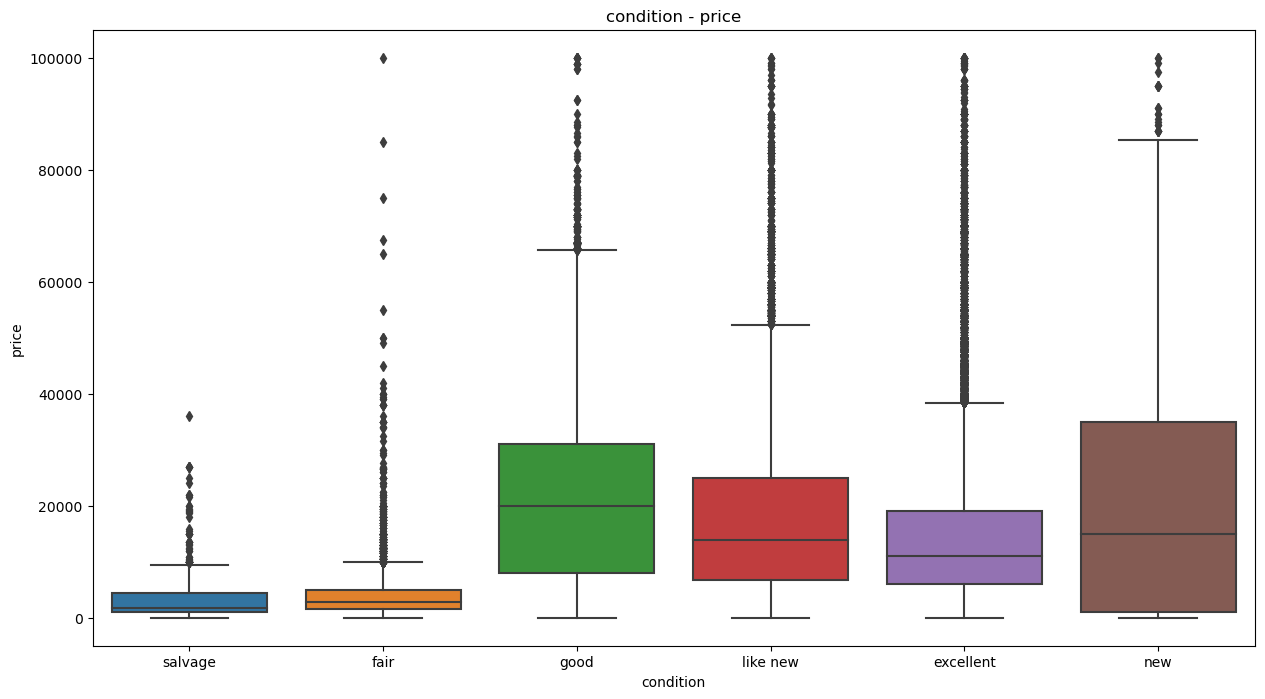

In [213]:
plt.figure(figsize = (15,8))
sns.boxplot(x = 'condition', y = 'price', data = df[df['price']  <= 10**5], order = condition_order)
plt.title('condition - price')
plt.show()

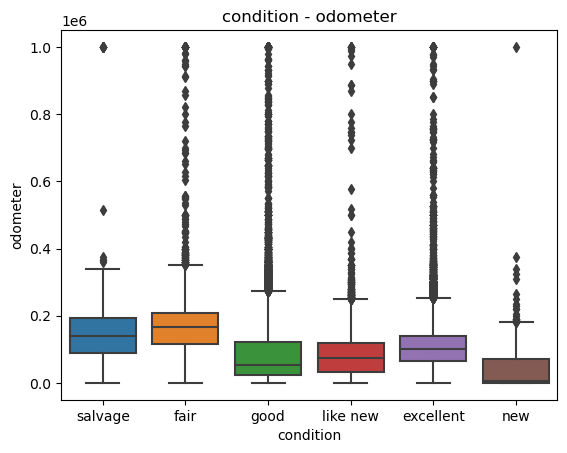

In [215]:
sns.boxplot(x = 'condition', y = 'odometer', data = df[df['odometer'] <= 10**6], order = condition_order)
plt.title('condition - odometer')
plt.show()

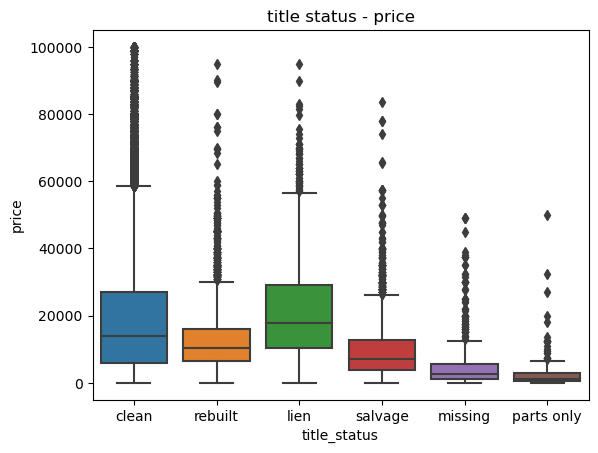

In [217]:
sns.boxplot(x = 'title_status', y = 'price', data = df[df['price']  <= 10**5])
plt.title('title status - price')
plt.show()

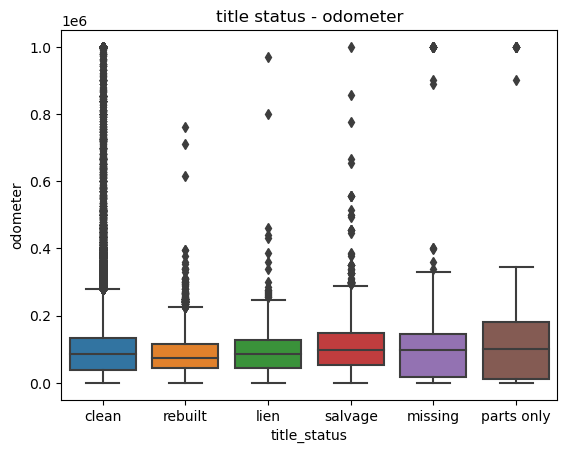

In [219]:
sns.boxplot(x = 'title_status', y = 'odometer', data = df[df['odometer'] <= 10**6])
plt.title('title status - odometer')
plt.show()

In [58]:
df.groupby('condition')['title_status'].value_counts()

condition  title_status
excellent  clean            91734
           rebuilt           2823
           salvage            880
           lien               586
           missing             57
           parts only          18
fair       clean             6156
           salvage            209
           missing            188
           rebuilt            142
           lien                47
           parts only          27
good       clean           118461
           rebuilt           1362
           salvage            893
           lien               389
           missing            208
           parts only          29
like new   clean            19870
           rebuilt            791
           lien               265
           salvage            235
           parts only           9
           missing              8
new        clean             1226
           rebuilt             30
           lien                25
           salvage             15
           missing      

In [59]:
df.groupby('title_status')['condition'].value_counts()

title_status  condition
clean         good         118461
              excellent     91734
              like new      19870
              fair           6156
              new            1226
              salvage         225
lien          excellent       586
              good            389
              like new        265
              fair             47
              new              25
              salvage           3
missing       good            208
              fair            188
              excellent        57
              salvage          49
              like new          8
              new               5
parts only    salvage          41
              good             29
              fair             27
              excellent        18
              like new          9
              new               4
rebuilt       excellent      2823
              good           1362
              like new        791
              fair            142
              new       

In [ ]:
Notes
[
price : 
    zeros and outliers
        
odometer :
    outliers
    

    
manufacturer & model :
    populating on each other
    
cylinders, , drive, type:
    populate on the model
    
paint_color:
    fill with 'custom'

    
condition:
    fill with 'good' or 'excellent'
    

    
VIN :
    convert to binary
]